## Load Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data_1A.csv")
df.head()

,Unnamed: 0,text,label
0,0,The Theory of Everything Review Stephen Hawkin...,Books
1,1,Computer Networks: A Top - Down Approach About...,Books
2,2,Sajani Premium Quality Brown Wooden Coat Hange...,Household
3,3,Bosch Lifestyle MCM3501M 800-Watt Food Process...,Household
4,4,Secret Wish Women's Navy-Blue Towel Bathrobe (...,Household


## EDA

In [3]:
df.size

37818

In [4]:
df.isna().sum()

Unnamed: 0    0
text          1
label         0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df['text'] = df['text'].astype(str)
df['Text Length'] = df['text'].apply(len)
df

,Unnamed: 0,text,label,Text Length
0,0,The Theory of Everything Review Stephen Hawkin...,Books,4009
1,1,Computer Networks: A Top - Down Approach About...,Books,129
2,2,Sajani Premium Quality Brown Wooden Coat Hange...,Household,1916
3,3,Bosch Lifestyle MCM3501M 800-Watt Food Process...,Household,440
4,4,Secret Wish Women's Navy-Blue Towel Bathrobe (...,Household,182
...,...,...,...,...
12601,12601,Lotus Makeup Ecostay Insta Smooth Perfecting P...,Household,289
12602,12602,The Subtle Art of Not Giving a F*ck Review “Re...,Books,3078
12603,12603,Elevanto Premium Collection 3/4Th Sleeve Terry...,Household,333
12604,12604,WD My Passport 4TB Portable External Hard Driv...,Electronics,335


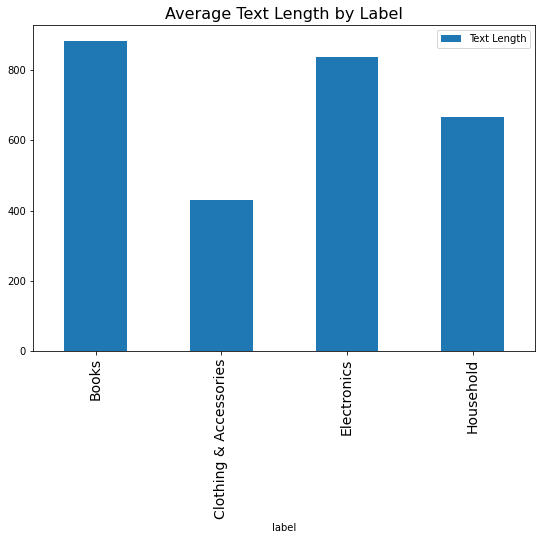

In [7]:
plt.figure(figsize=(9,6))
df.groupby("label").agg({"Text Length":"mean"}).plot(kind = 'bar', ax = plt.gca())
plt.title("Average Text Length by Label", fontsize = 16)
plt.xticks(fontsize = 14)
plt.show()

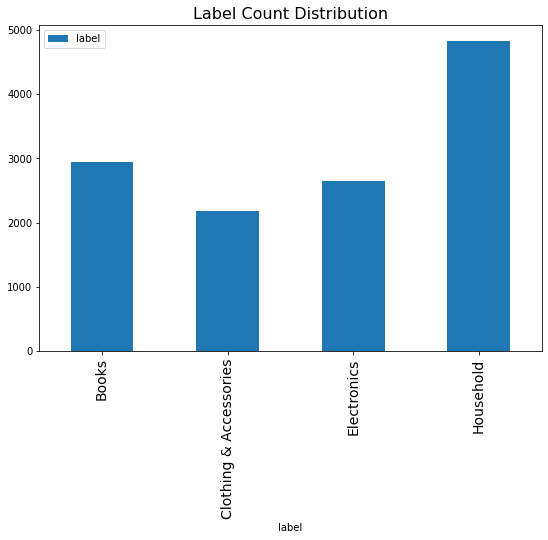

In [8]:
plt.figure(figsize=(9,6))
df.groupby("label").agg({"label":"count"}).plot(kind = 'bar', ax = plt.gca())
plt.title("Label Count Distribution", fontsize = 16)
plt.xticks(fontsize = 14)
plt.show()


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,12605.0,6302.584371,3639.315115,0.0,3151.0,6303.0,9454.0,12605.0
Text Length,12605.0,712.994367,1140.659810,4.0,217.0,483.0,945.0,50403.0


## Preprocessing

### Cleaning

Proses text cleaning melibatkan pembersihan teks dari elemen-elemen yang tidak relevan, seperti tanda baca, angka, atau karakter khusus, untuk membuat teks lebih konsisten dan siap diproses.

In [18]:
import regex as re
def clean(text):
 return re.sub(r'[^A-Za-z0-9\s]', '', text)

### Tokenization

Tokenization adalah proses memecah teks menjadi bagian-bagian yang lebih kecil, yang disebut token. Ini dilakukan untuk memudahkan analisa data.


In [10]:
from nltk.tokenize import word_tokenize
def tokenize(text):
 return word_tokenize(text)

### Stopword Removal

 Stopword removal menghilangkan kata-kata umum yang tidak memiliki makna penting dalam analisis, seperti "dan", "yang", atau "di". Hal ini membantu mengurangi noise dan meningkatkan fokus pada kata-kata yang lebih bermakna.

In [11]:
import nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
def remove_stop(tokens):
 return [t for t in tokens if t.lower() not in stopwords]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Andy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Lemmatization

Lemmatization mengonversi kata-kata menjadi bentuk dasar atau lemma-nya, seperti mengubah "berlari" menjadi "lari". Ini dilakukan untuk menyatukan berbagai bentuk kata dan memudahkan analisis.

In [48]:
from nltk.stem import WordNetLemmatizer

def lemmatize(tokens):
    lemmatizer = WordNetLemmatizer()
    tokens_lemmatized = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens_lemmatized

In [49]:
pipeline = [clean, str.lower, tokenize, remove_stop]
def prepare(text, pipeline):
  tokens = text
  for transform in pipeline:
    tokens = transform(tokens)

  return tokens

In [50]:
df['tokens'] = df['text'].apply(prepare, pipeline = pipeline)

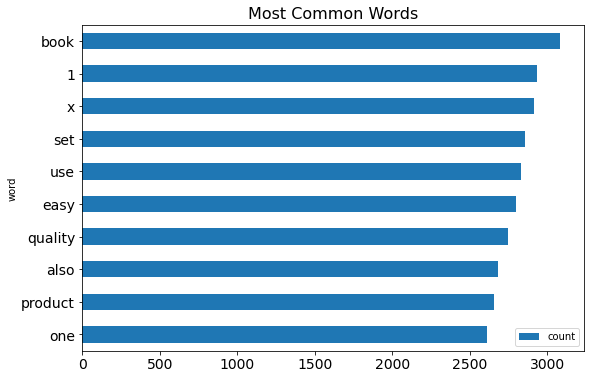

In [51]:
from collections import Counter
counter = Counter()
df["tokens"].map(counter.update)
plt.figure(figsize=(9,6))
pd.DataFrame(counter.most_common(10), columns = ['word', 'count']).sort_values("count").plot(kind = 'barh', x = 'word', ax = plt.gca())
plt.title("Most Common Words", fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()


In [52]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest  = train_test_split(df['text'], df['label'], test_size=0.15)

In [53]:
xtrain_tokens = xtrain.apply(prepare, pipeline = pipeline)
xtest_tokens = xtest.apply(prepare, pipeline = pipeline)

### Bag of Words

Bag of Words (BoW) adalah model representasi teks yang mengabaikan urutan kata dan hanya mempertimbangkan frekuensi kemunculan kata-kata dalam dokumen. Dalam model ini, setiap dokumen diwakili sebagai vektor dari jumlah kemunculan kata-kata unik yang terdapat dalam korpus.

In [112]:
from sklearn.feature_extraction.text import CountVectorizer

xtrain_sentences = [" ".join(tokens) for tokens in xtrain_tokens]
xtest_sentences = [" ".join(tokens) for tokens in xtest_tokens]
vectorizer = CountVectorizer(max_features=1500)
one_hot_train = vectorizer.fit_transform(xtrain_sentences).toarray()
one_hot_test = vectorizer.transform(xtest_sentences).toarray()


### TF-IDF

TF-IDF (Term Frequency-Inverse Document Frequency) adalah metode yang digunakan untuk menilai seberapa penting suatu kata dalam dokumen relatif terhadap kumpulan dokumen lainnya. TF mengukur frekuensi kata dalam dokumen, sedangkan IDF mengukur seberapa umum atau jarangnya kata tersebut di seluruh korpus; kombinasi keduanya memberikan bobot yang lebih tinggi pada kata-kata yang lebih informatif.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1500)
tfidf_train = tfidf.fit_transform(xtrain_sentences)
tfidf_test = tfidf.transform(xtest_sentences)
tfidf_train = pd.DataFrame(tfidf_train.toarray(), columns=tfidf.get_feature_names_out())
tfidf_test = pd.DataFrame(tfidf_test.toarray(), columns=tfidf.get_feature_names_out())


In [110]:
tfidf_train.head()

,10,100,1000,1080p,11,12,13,14,15,150,...,yellow,yes,yet,yoga,york,youll,young,youre,zipper,zoom
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.124248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.113376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model training

### Random Forest

Random Forest adalah algoritma pembelajaran mesin berbasis ensemble yang menggunakan sejumlah pohon keputusan untuk meningkatkan akurasi dan mengurangi overfitting. 

#### Bag of Words Encoding Tuning

Hyperparameter Random Search adalah teknik untuk mencari kombinasi optimal dari hyperparameter model dengan cara acak.

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid = { 
    'n_estimators': [50, 100, 150], 
    'max_features': ['sqrt', 'log2'], 
    'criterion':['gini', 'entropy']
} 
grid_search = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=param_grid, n_iter=10, verbose=True) 
grid_search.fit(one_hot_train, ytrain) 
print("Random Forest One Hot Encoding: ",grid_search.best_params_) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Random Forest One Hot Encoding:  {'n_estimators': 150, 'max_features': 'log2', 'criterion': 'gini'}


#### Tf_IDF Encoding Tuning

In [61]:
param_grid = { 
    'n_estimators': [50, 100, 150], 
    'max_features': ['sqrt', 'log2'], 
    'criterion':['gini', 'entropy']
} 
grid_search = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=param_grid, n_iter=10, verbose=True) 
grid_search.fit(tfidf_train, ytrain) 
print(grid_search.best_params_) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 100, 'max_features': 'log2', 'criterion': 'gini'}


#### Random Forest Bag of Words

In [79]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=150,max_features='log2', criterion='gini')
rfc.fit(one_hot_train, ytrain)
from sklearn.metrics import classification_report
prediction_forest = rfc.predict(one_hot_test)
print(classification_report(ytest, prediction_forest))

                        precision    recall  f1-score   support

                 Books       0.97      0.95      0.96       433
Clothing & Accessories       0.96      0.96      0.96       317
           Electronics       0.95      0.90      0.92       400
             Household       0.92      0.96      0.94       741

              accuracy                           0.94      1891
             macro avg       0.95      0.94      0.95      1891
          weighted avg       0.94      0.94      0.94      1891



#### Random Forest TF-IDF

In [90]:
rfc = RandomForestClassifier(n_estimators=100, max_features='log2', criterion='gini')
rfc.fit(tfidf_train, ytrain)
from sklearn.metrics import classification_report
prediction_forest = rfc.predict(tfidf_test)
print(classification_report(ytest, prediction_forest))

                        precision    recall  f1-score   support

                 Books       0.97      0.95      0.96       433
Clothing & Accessories       0.97      0.94      0.96       317
           Electronics       0.95      0.90      0.92       400
             Household       0.92      0.97      0.95       741

              accuracy                           0.95      1891
             macro avg       0.95      0.94      0.95      1891
          weighted avg       0.95      0.95      0.95      1891



### SVM

Support Vector Machine (SVM) adalah algoritma pembelajaran mesin yang digunakan untuk klasifikasi dan regresi dengan mencari hyperplane optimal yang memisahkan data ke dalam kelas-kelas yang berbeda.

#### One Hot Encoding Tuning

In [47]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid = {'C': [0.1, 1, 10],  
              'gamma': [1, 0.1, 0.01, 'scale'], 
              'kernel': ['rbf', 'linear', 'sigmoid']}  

grid_search = RandomizedSearchCV(SVC(), 
                           param_distributions=param_grid, n_iter=10, verbose=True) 
grid_search.fit(one_hot_train, ytrain) 
print("SVC One Hot Encoding: ",grid_search.best_params_) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits
SVC One Hot Encoding:  {'kernel': 'sigmoid', 'gamma': 0.01, 'C': 10}


#### TF-IDF Tuning

In [58]:

param_grid = {'C': [0.1, 1, 10],  
              'gamma': [1, 0.1, 0.01, 'scale'], 
              'kernel': ['rbf', 'linear', 'sigmoid']}  

grid_search = RandomizedSearchCV(SVC(), 
                           param_distributions=param_grid, n_iter=10, verbose=True) 
grid_search.fit(tfidf_train, ytrain) 
print("SVC TF-IDF: ",grid_search.best_params_) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits
SVC TF-IDF:  {'kernel': 'linear', 'gamma': 0.01, 'C': 1}


#### SVM One Hot Encoding

In [80]:
from sklearn.svm import SVC
svm = SVC(kernel='sigmoid', gamma=0.01, C=10)
svm.fit(one_hot_train, ytrain)
prediction_svc = svm.predict(one_hot_test)
from sklearn.metrics import classification_report
print(classification_report(ytest, prediction_svc))


                        precision    recall  f1-score   support

                 Books       0.88      0.94      0.91       433
Clothing & Accessories       0.94      0.91      0.93       317
           Electronics       0.92      0.88      0.90       400
             Household       0.93      0.92      0.92       741

              accuracy                           0.92      1891
             macro avg       0.92      0.91      0.92      1891
          weighted avg       0.92      0.92      0.92      1891



#### SVM TF-IDF

In [91]:
svm = SVC(kernel='linear', gamma=0.01, C=1)
svm.fit(tfidf_train, ytrain)
prediction_svc = svm.predict(tfidf_test)
from sklearn.metrics import classification_report
print(classification_report(ytest, prediction_svc))


                        precision    recall  f1-score   support

                 Books       0.96      0.95      0.96       433
Clothing & Accessories       0.96      0.97      0.97       317
           Electronics       0.94      0.90      0.92       400
             Household       0.94      0.96      0.95       741

              accuracy                           0.95      1891
             macro avg       0.95      0.95      0.95      1891
          weighted avg       0.95      0.95      0.95      1891



## Results

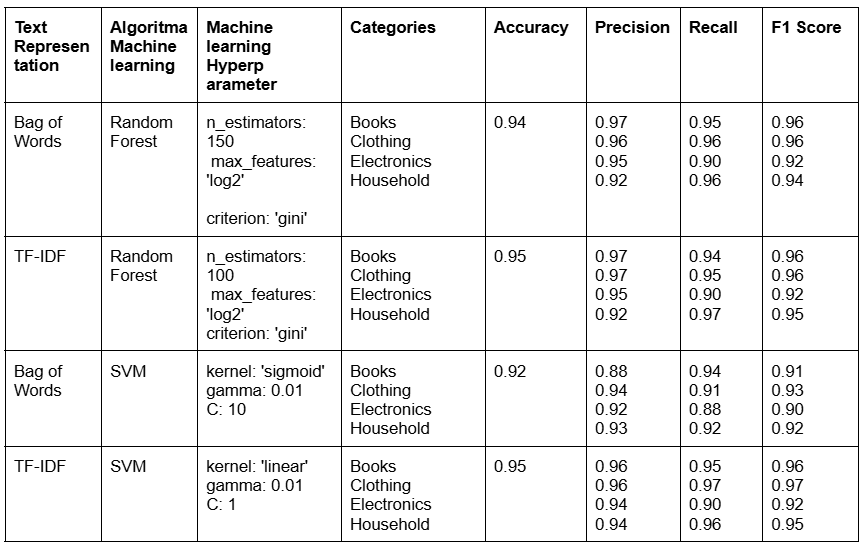

In [2]:
from IPython.display import Image

# Display the image
Image(filename='Table.png')

Dapat dilihat bahwa kedua algoritma jika TF-IDF menghasilkan performance yang lebih baik dibandingkan bag of words. Ini dikarenakan TF-IDF lebih holistik saat mempertimbangkan value dari sebuah kata, mempertimbangkan keseluruhan korpus dibandingkan dengan bag of words yang hanya menggunakan frekuensi kata tanpa konteks tambahan apa pun. Perbandingan random forest dan SVM tidak terlalu jauh jika mengambil yang terbaik untuk keduanya yaitu 95%, dimana perbedaan dalam beberapa metrik sangat kecil sehingga dapat dibilang negligible. 